<a href="https://colab.research.google.com/github/Janani-selvakumaravelan/SignVision-Intelligent-Traffic-Sign-Recognition-using-CNNs/blob/main/SignVision_Intelligent_Traffic_Sign_Recognition_using_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 66.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import GTSRB
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt


Exception ignored in: <function WeakSet.__init__.<locals>._remove at 0x78a070205080>
Traceback (most recent call last):
  File "/usr/lib/python3.11/_weakrefset.py", line 39, in _remove
    def _remove(item, selfref=ref(self)):

KeyboardInterrupt: 


In [ ]:
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor()
])


In [ ]:
# Load training data
train_dataset = GTSRB(root='./data', split='train', transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Load testing data
test_dataset = GTSRB(root='./data', split='test', transform=transform, download=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


100%|██████████| 187M/187M [00:10<00:00, 18.6MB/s]
100%|██████████| 89.0M/89.0M [00:04<00:00, 21.0MB/s]
100%|██████████| 99.6k/99.6k [00:00<00:00, 230kB/s]


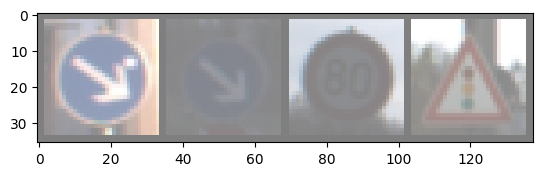

In [ ]:
# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Import numpy
import numpy as np

# Display images
def imshow(img):
    img = img / 2 + 0.5  # unnormalize if needed
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images[:4]))

In [ ]:
#Build the CNN model
import torch.nn as nn
import torch.nn.functional as F

class TrafficSignCNN(nn.Module):
    def __init__(self):
        super(TrafficSignCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 8 * 8, 256)
        self.fc2 = nn.Linear(256, 43)  # 43 traffic sign classes

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))  # [batch, 32, 16, 16]
        x = self.pool(F.relu(self.conv2(x)))  # [batch, 64, 8, 8]
        x = x.view(-1, 64 * 8 * 8)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


In [ ]:
#Train the model
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = TrafficSignCNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(5):  # 5 epochs
    running_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss/len(train_loader):.4f}")


Epoch 1, Loss: 1.5097
Epoch 2, Loss: 0.2453
Epoch 3, Loss: 0.1200
Epoch 4, Loss: 0.0730
Epoch 5, Loss: 0.0452
Epoch 6, Loss: 0.0511
Epoch 7, Loss: 0.0299
Epoch 8, Loss: 0.0168
Epoch 9, Loss: 0.0222
Epoch 10, Loss: 0.0244


In [ ]:
#evaluate the model
correct = 0
total = 0
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")


Test Accuracy: 87.54%


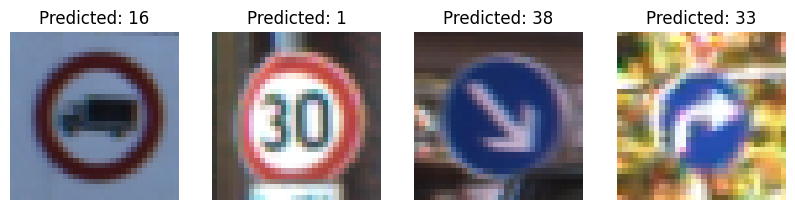

In [ ]:
#Predict on fewe test image
import matplotlib.pyplot as plt

dataiter = iter(test_loader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3))
for idx in range(4):
    axes[idx].imshow(images[idx].permute(1, 2, 0))
    axes[idx].set_title(f'Predicted: {predicted[idx].item()}')
    axes[idx].axis('off')
plt.show()
